In [476]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Data import

In [477]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data preprocessing

The first step is to check which columns are important and which not. The 'Id' column does not have effect on the training procedure, therefore it can be removed.

In [478]:
df = df.drop(["Id"], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Then, we check whether dataframe contains null values or not. In this case all values are provided and it does not require any additional actions related to filling the data. It is important to note that 'Species' column is a categorical column.

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The next step is to transform categorical column into numerical values in order to train the model. 'Species' column consists of 3 values ('Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'). We transformed those values into numbers: 0, 1, 2.

In [480]:
categories = df['Species'].unique()
print(categories)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [481]:
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


After that, we split datasest into the train (80% of original dataset) and the test (20% of original dataset) datasets. Then we transformed them into inputs and targets for loss functions.

In [482]:
X = df.drop('Species', axis=1).values
y = df['Species'].values

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [484]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Learning procedure

In [485]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=25, hidden_layer2=30, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1)                  
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)                  
        self.out = nn.Linear(hidden_layer2, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

### Cross entropy loss

In [486]:
model     = Model(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer.zero_grad()
model

Model(
  (fc1): Linear(in_features=4, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=3, bias=True)
)

In [504]:
epochs = 100
losses = []
losses_items = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    #loss = criterion(y_pred, y_train.view(-1, 1))
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    losses_items.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 0.08039130
epoch:  1  loss: 0.08026760
epoch:  2  loss: 0.08014550
epoch:  3  loss: 0.08002503
epoch:  4  loss: 0.07990613
epoch:  5  loss: 0.07978883
epoch:  6  loss: 0.07967305
epoch:  7  loss: 0.07955880
epoch:  8  loss: 0.07944598
epoch:  9  loss: 0.07933460
epoch: 10  loss: 0.07922460
epoch: 11  loss: 0.07911599
epoch: 12  loss: 0.07900868
epoch: 13  loss: 0.07890271
epoch: 14  loss: 0.07879802
epoch: 15  loss: 0.07869459
epoch: 16  loss: 0.07859234
epoch: 17  loss: 0.07849134
epoch: 18  loss: 0.07839151
epoch: 19  loss: 0.07829287
epoch: 20  loss: 0.07819535
epoch: 21  loss: 0.07809894
epoch: 22  loss: 0.07800364
epoch: 23  loss: 0.07790937
epoch: 24  loss: 0.07781618
epoch: 25  loss: 0.07772405
epoch: 26  loss: 0.07763286
epoch: 27  loss: 0.07754270
epoch: 28  loss: 0.07745353
epoch: 29  loss: 0.07736531
epoch: 30  loss: 0.07727800
epoch: 31  loss: 0.07719166
epoch: 32  loss: 0.07710616
epoch: 33  loss: 0.07702158
epoch: 34  loss: 0.07693787
epoch: 35  loss: 0.0

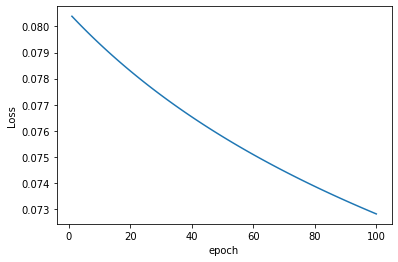

In [507]:
plt.plot(np.arange(1, epochs+1), losses_items)
plt.ylabel('Loss')
plt.xlabel('epoch');
#losses.detach().numpy() 

In [ ]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_test_prediction = model.forward(val)
        preds.append(y_test_prediction.argmax().item())

In [ ]:
test_df = pd.DataFrame({'Y': y_test, 'Prediction': preds})
test_df['Correct'] = [1 if correct == prediction else 0 for correct, prediction in zip(test_df['Y'], test_df['Prediction'])]

In [ ]:
test_df

,Y,Prediction,Correct
0,2,2,1
1,1,1,1
2,0,0,1
3,2,2,1
4,0,0,1
5,2,2,1
6,0,0,1
7,1,1,1
8,1,1,1
9,1,1,1


### Accuracy

In [ ]:
accuracy = test_df['Correct'].sum() / len(test_df)
print("Accuracy: ", accuracy)


Accuracy:  1.0
